# Credit Card Approval Detection Using Machine Learning Through Financial Data

## Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Here we have various machine learning algorithms on the given financial data to draw comparisons between their performances.

## Task

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

## Downloading Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rikdifos/credit-card-approval-prediction")

print('Dataset download complete.')

Dataset download complete.


## Imports

In [2]:
import warnings
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)          # Show all columns
pd.set_option('display.width', None)                # Adjust width dynamically
pd.set_option('display.expand_frame_repr', False)   # Prevent column wrapping
warnings.filterwarnings('ignore')                   # To avoid all warnings

## Preprocessing

Firstly, we will be focusing on the application dataset.

In [4]:
application = pd.read_csv(path + "/application_record.csv")
credit_record = pd.read_csv(path + "/credit_record.csv")

In [5]:
print(f'application shape: {application.shape}')
print(f'credit_record shape: {credit_record.shape}')

application shape: (438557, 18)
credit_record shape: (1048575, 3)


In [6]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


It appears that most of the null values in 'OCCUPATION_TYPE' feature has something in common, they all appear to be pensioners in the 'NAME_INCOME_TYPE' feature, which is logical if you think about it, that a retired person shouldn't be working.

In [7]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

* ID: Unique Id of the row
* CODE_GENDER: Gender of the applicant. M is male and F is female.
* FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.
* FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.
* CNT_CHILDREN: Count of children.
* AMT_INCOME_TOTAL: the amount of the income.
* NAME_INCOME_TYPE: The type of income (5 types in total).
* NAME_EDUCATION_TYPE: The type of education (5 types in total).
* NAME_FAMILY_STATUS: The type of family status (6 types in total).
* DAYS_BIRTH: The number of the days from birth (Negative values).
* DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.
* FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.
* FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.
* FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.
* FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.
* OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.
* CNT_FAM_MEMBERS: The count of family members.

### 1. Duplicates

In [8]:
application.duplicated(subset='ID').value_counts()

False    438510
True         47
Name: count, dtype: int64

It appears that the application dataset has some duplicates, so we will be dropping them.

In [9]:
application.drop_duplicates(subset='ID', inplace=True)

### 2. Unique Values

In [10]:
features = application.select_dtypes(include='object').columns.tolist()

for feature in features:
  print(f'{feature}: {application[feature].nunique()}')
  print(f'{application[feature].unique()}')

CODE_GENDER: 2
['M' 'F']
FLAG_OWN_CAR: 2
['Y' 'N']
FLAG_OWN_REALTY: 2
['Y' 'N']
NAME_INCOME_TYPE: 5
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_EDUCATION_TYPE: 5
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: 5
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
NAME_HOUSING_TYPE: 6
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
OCCUPATION_TYPE: 18
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>],
       [<Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>],
       [<Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>, <Axes: >, <Axes: >]],
      dtype=object)

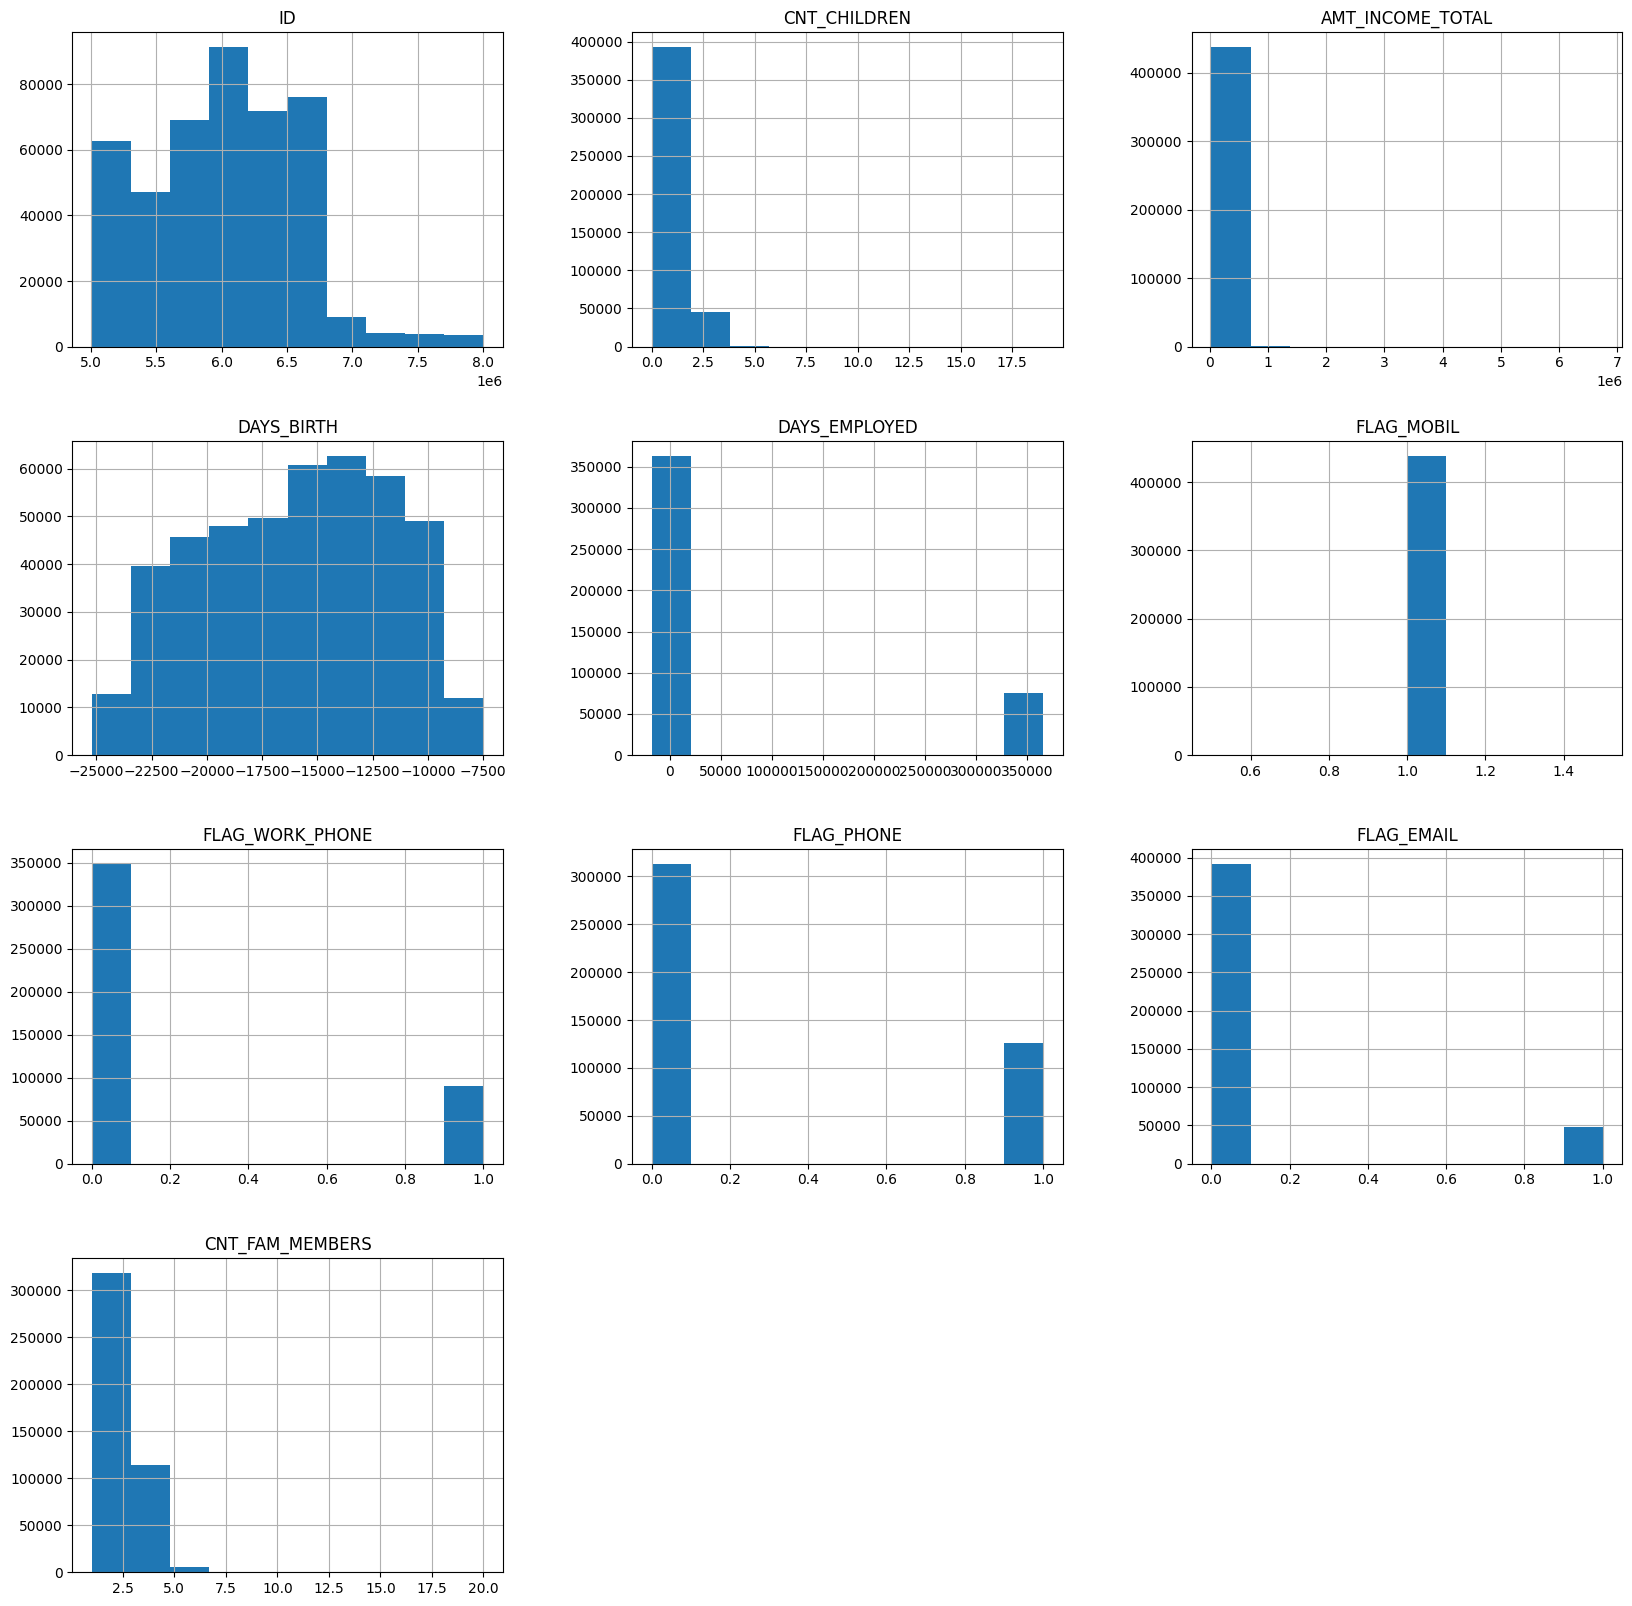

In [11]:
application.hist(figsize=(20,20))

### 3. Null values

Like I stated before most of the null values are pensioners, so we will be further exploring that concept.

In [12]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

<Axes: >

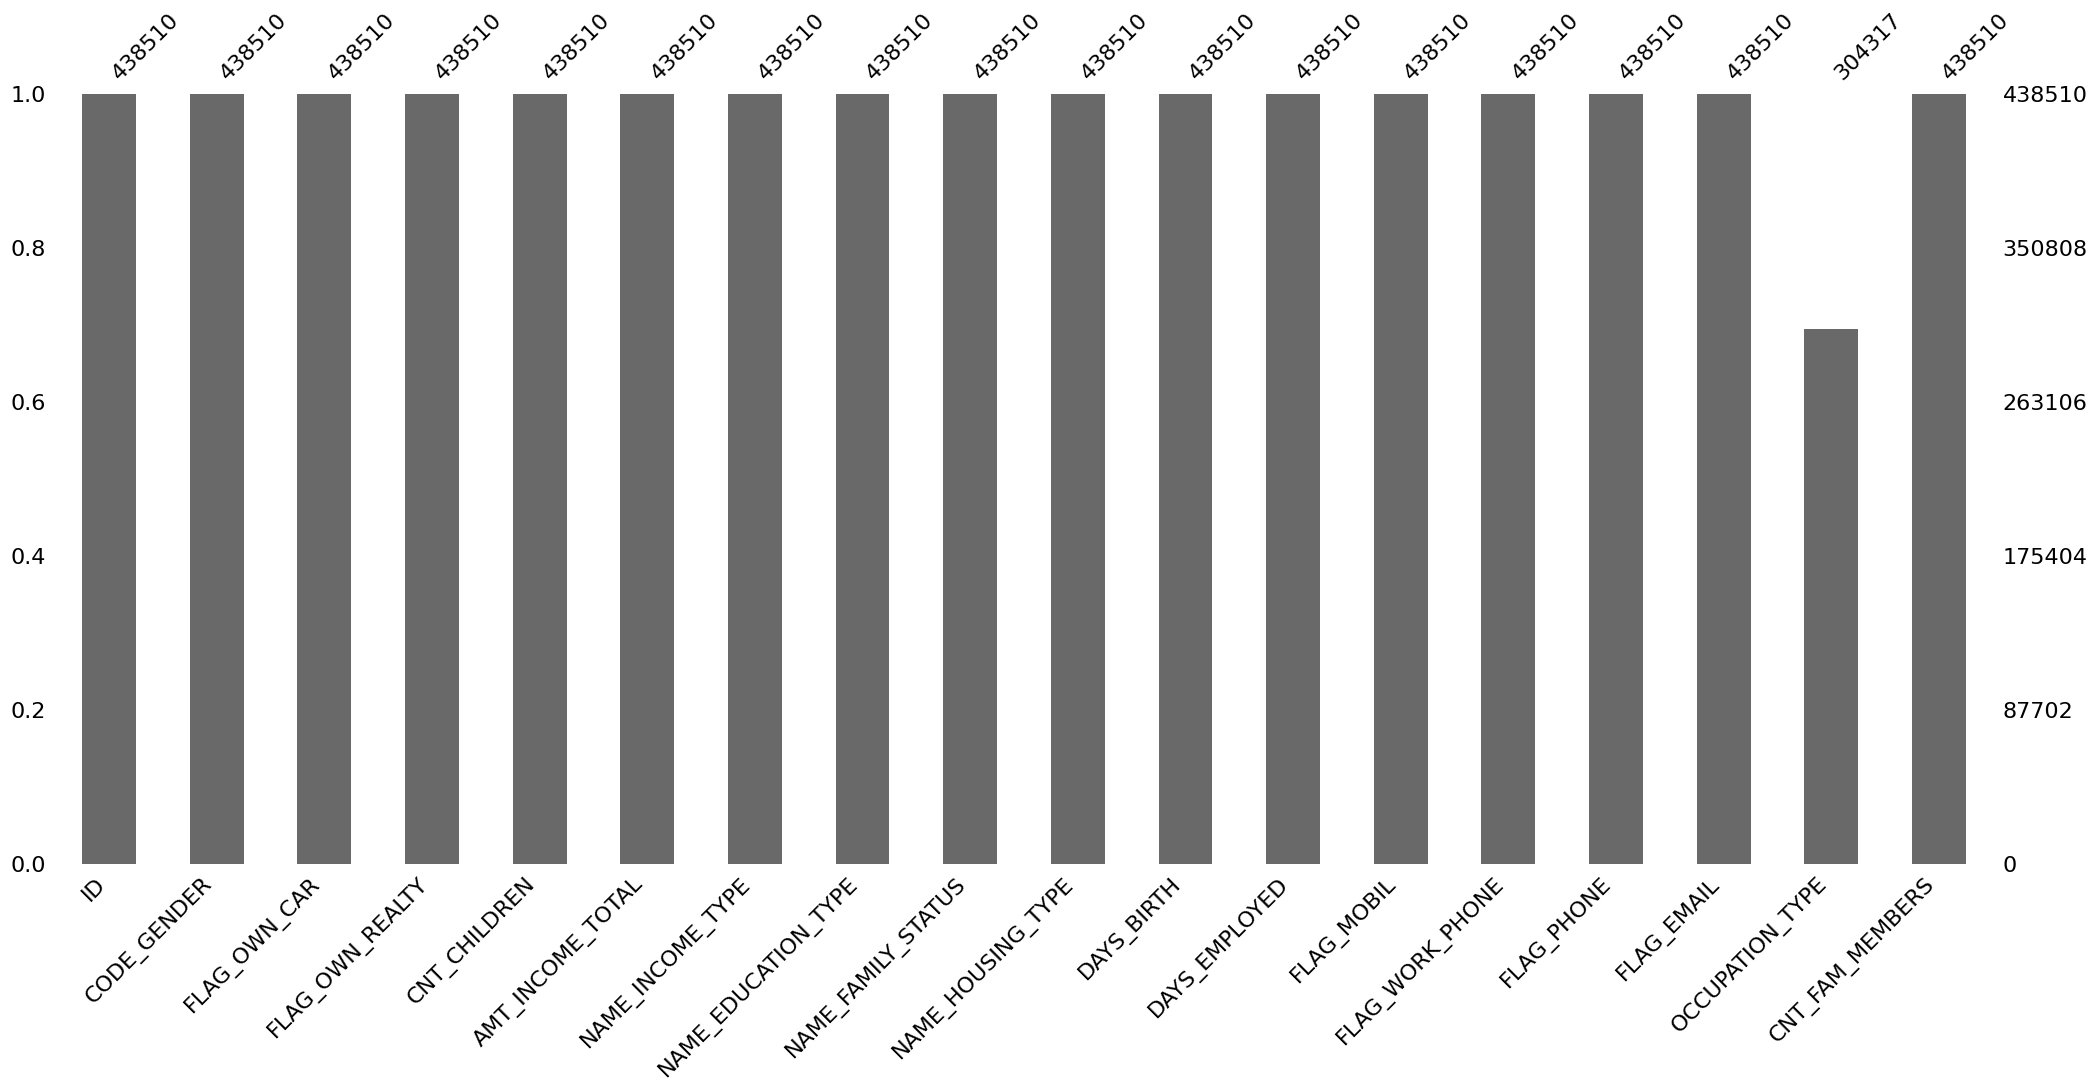

In [13]:
missingno.bar(application)

In [14]:
print((application['OCCUPATION_TYPE'].isnull().sum() / application.shape[0]) * 100 ,'%')

30.602038722035985 %


It appears that nearly a third of 'OCCUPATION_TYPE' feature are nulls.

In [15]:
pensioners = application['OCCUPATION_TYPE'][application['NAME_INCOME_TYPE'] == 'Pensioner']
others = application['OCCUPATION_TYPE'][application['NAME_INCOME_TYPE'] != 'Pensioner']

print(f"Percentage of nulls that are pensioners: {(pensioners.isnull().sum() / application['OCCUPATION_TYPE'].isnull().sum()) * 100} %")
print(f"Percentage of nulls that are NOT pensioners: {(others.isnull().sum() / application['OCCUPATION_TYPE'].isnull().sum()) * 100} %")

Percentage of nulls that are pensioners: 56.15196023637596 %
Percentage of nulls that are NOT pensioners: 43.84803976362404 %


As we see that half of the null values are pensioners and the other 4 types are less than 50% .

According to the context of the data, there are 2 features that decides the 'OCCUPATION_TYPE' for the clients and they are 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'.

So we will be checking the mode for every type of job and their academic degree.

In [16]:
df = pd.DataFrame(application[['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']])
df.set_index(['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'], inplace=True)

df.dropna(inplace=True)

In [17]:
df

OCCUPATION_TYPE
NAME_INCOME_TYPE     NAME_EDUCATION_TYPE                          
Working              Secondary / secondary special  Security staff
Commercial associate Secondary / secondary special     Sales staff
                     Secondary / secondary special     Sales staff
                     Secondary / secondary special     Sales staff
                     Secondary / secondary special     Sales staff
...                                                            ...
Working              Higher education                     Laborers
                     Secondary / secondary special        Laborers
                     Secondary / secondary special        Laborers
Commercial associate Higher education                  Sales staff
Working              Secondary / secondary special     Sales staff

[304317 rows x 1 columns]

In [18]:
for job in application['NAME_INCOME_TYPE'].unique():
    for edu in application['NAME_EDUCATION_TYPE'].unique():
        if job == 'Student' and edu not in ['Higher education', 'Secondary / secondary special']:
            continue
        if job == 'Pensioner' and edu not in ['Higher education', 'Secondary / secondary special', 'Incomplete higher']:
            continue
        print(f"{job}, {edu}: {df.loc[job, edu]['OCCUPATION_TYPE'].mode()[0]}")

Working, Higher education: Core staff
Working, Secondary / secondary special: Laborers
Working, Incomplete higher: Laborers


Working, Lower secondary: Laborers
Working, Academic degree: Core staff
Commercial associate, Higher education: Managers
Commercial associate, Secondary / secondary special: Laborers
Commercial associate, Incomplete higher: Managers
Commercial associate, Lower secondary: Laborers
Commercial associate, Academic degree: Sales staff
Pensioner, Higher education: Core staff
Pensioner, Secondary / secondary special: Laborers
Pensioner, Incomplete higher: High skill tech staff
State servant, Higher education: Core staff
State servant, Secondary / secondary special: Core staff
State servant, Incomplete higher: Core staff
State servant, Lower secondary: Medicine staff
State servant, Academic degree: Managers
Student, Higher education: Core staff
Student, Secondary / secondary special: Laborers


So there are the modes for their respective position and academic degree.

We will imputate the data accordingly.

Here is the percentage of nulls again before imputating any data.

In [19]:
print(f"{(application['OCCUPATION_TYPE'].isnull().sum() / application.shape[0]) * 100} %")

30.602038722035985 %


Now onto Data Imputation.

#### -> Data Imputation

In [20]:
# Working
mask = (application['NAME_INCOME_TYPE'] == 'Working') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Academic degree']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Core staff')

mask = (application['NAME_INCOME_TYPE'] == 'Working') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special', 'Incomplete higher', 'Lower secondary']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Laborers')

In [21]:
# Commercial associate
mask = (application['NAME_INCOME_TYPE'] == 'Commercial associate') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Incomplete higher']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Managers')

mask = (application['NAME_INCOME_TYPE'] == 'Commercial associate') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special', 'Lower secondary']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Laborers')

mask = (application['NAME_INCOME_TYPE'] == 'Commercial associate') & (application['NAME_EDUCATION_TYPE'].isin(['Academic degree']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Sales staff')

In [22]:
# State servant
mask = (application['NAME_INCOME_TYPE'] == 'State servant') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Secondary / secondary special', 'Incomplete higher']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Core staff')

mask = (application['NAME_INCOME_TYPE'] == 'State servant') & (application['NAME_EDUCATION_TYPE'].isin(['Lower secondary']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Medicine staff')

mask = (application['NAME_INCOME_TYPE'] == 'State servant') & (application['NAME_EDUCATION_TYPE'].isin(['Academic degree']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Managers')

In [23]:
# Pensioner
mask = (application['NAME_INCOME_TYPE'] == 'Pensioner') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Core staff')

mask = (application['NAME_INCOME_TYPE'] == 'Pensioner') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Laborers')

mask = (application['NAME_INCOME_TYPE'] == 'Pensioner') & (application['NAME_EDUCATION_TYPE'].isin(['Incomplete higher']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('High skill tech staff')

In [24]:
# Student
mask = (application['NAME_INCOME_TYPE'] == 'Student') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Core staff')

mask = (application['NAME_INCOME_TYPE'] == 'Student') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special']))
application.loc[mask, 'OCCUPATION_TYPE'] = application.loc[mask, 'OCCUPATION_TYPE'].fillna('Laborers')

Now to check the percentage of nulls.

In [25]:
print(f"{(application['OCCUPATION_TYPE'].isnull().sum() / application.shape[0]) * 100} %")

0.368520672276573 %


There is still a small percentage of nulls, which we will fill using the mode of the entire feature.

In [26]:
application['OCCUPATION_TYPE'].fillna(application['OCCUPATION_TYPE'].mode()[0], inplace=True)

print(f"{(application['OCCUPATION_TYPE'].isnull().sum() / application.shape[0]) * 100} %")

0.0 %


There are no more nulls.

### 4. Outliers

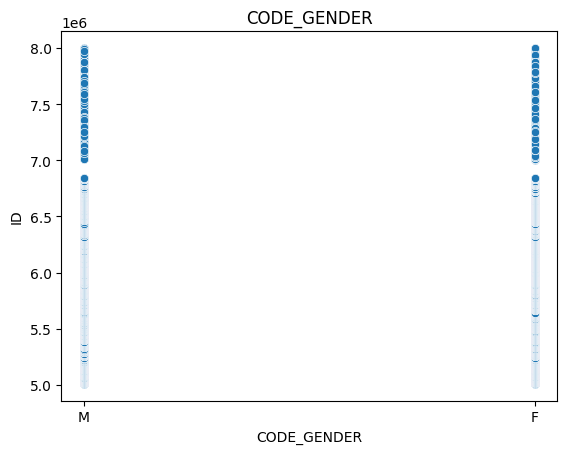

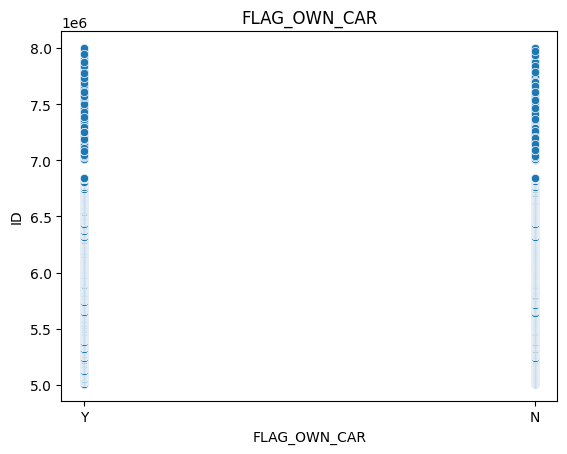

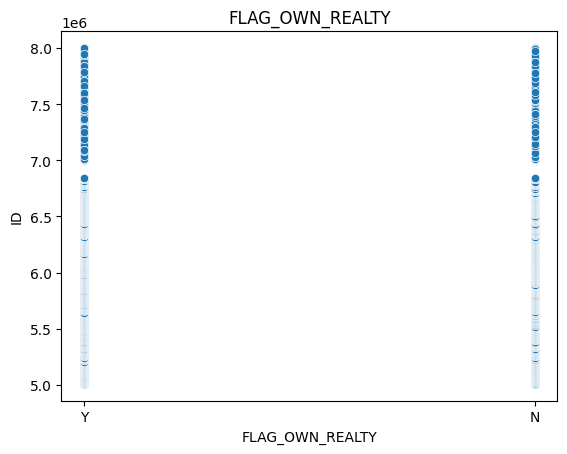

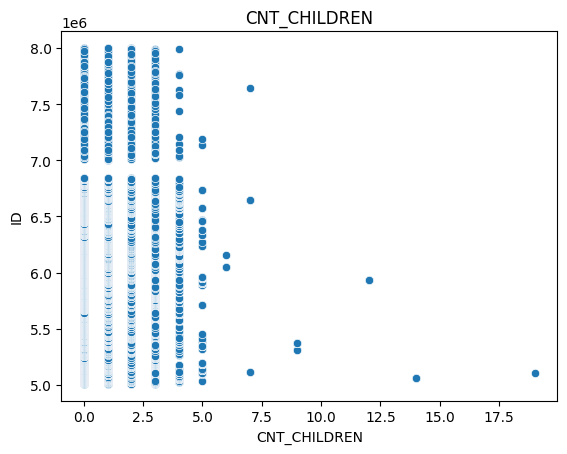

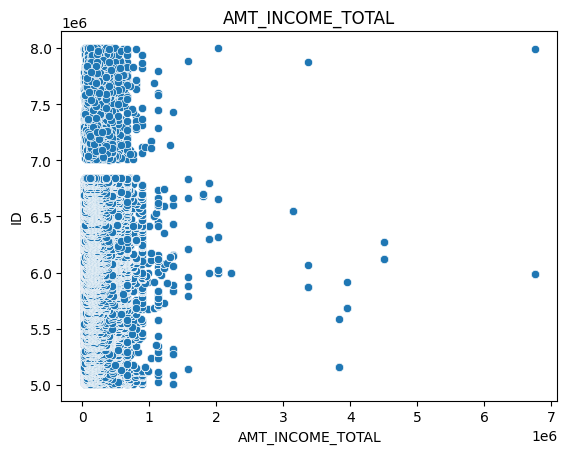

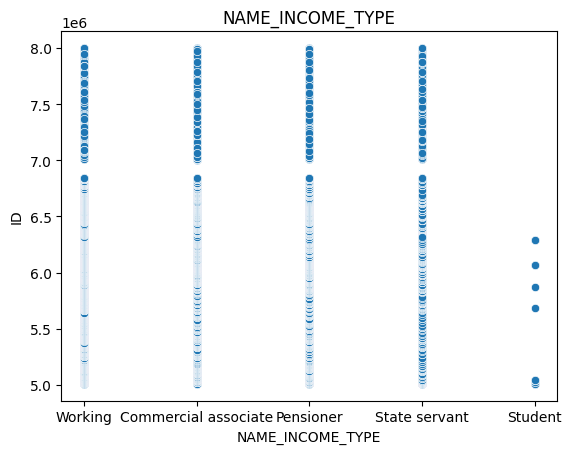

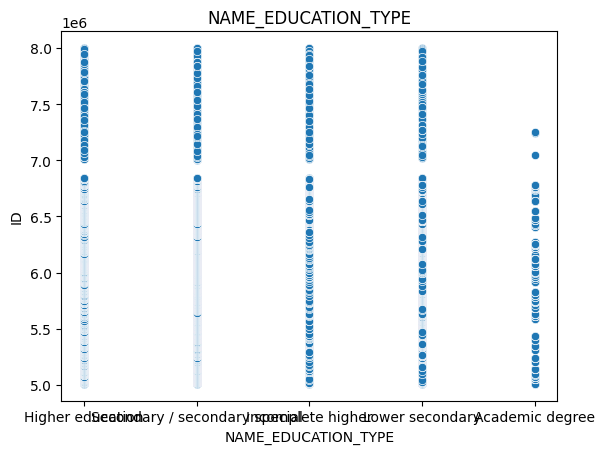

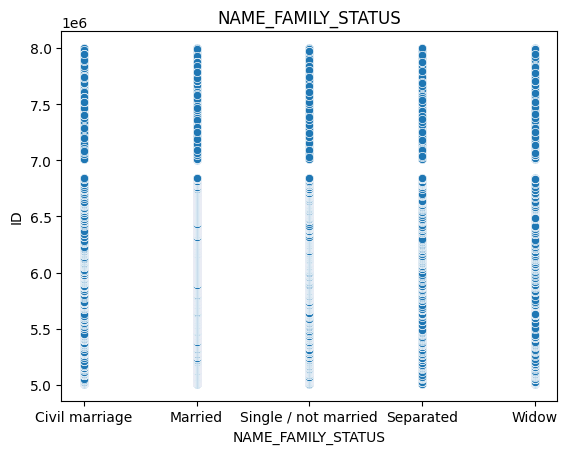

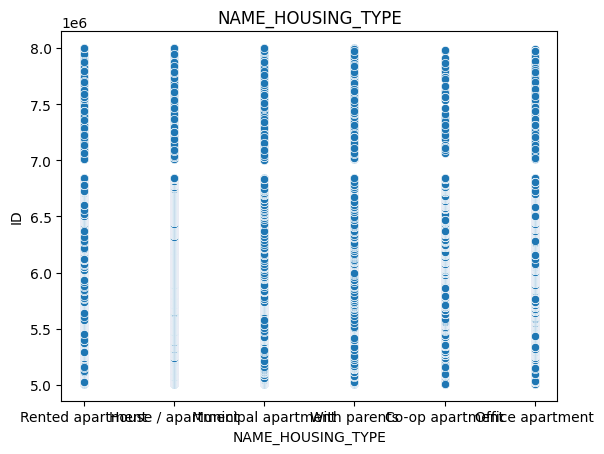

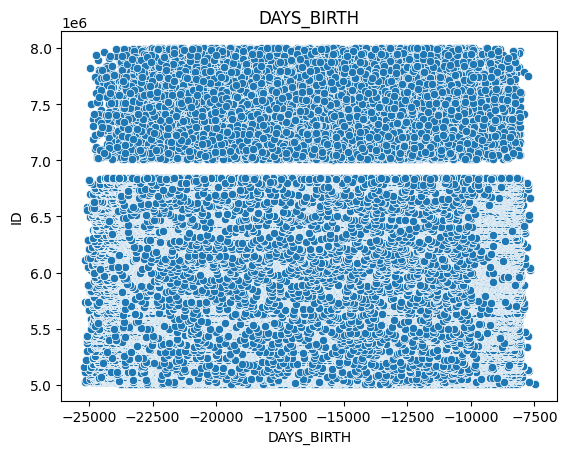

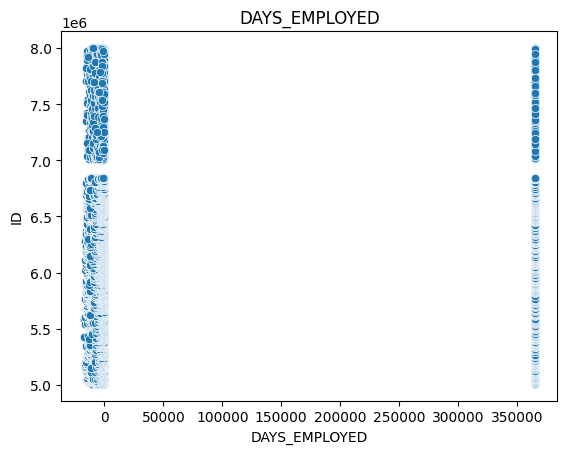

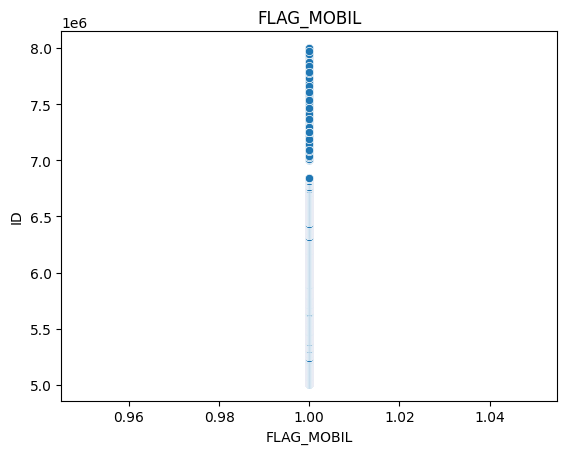

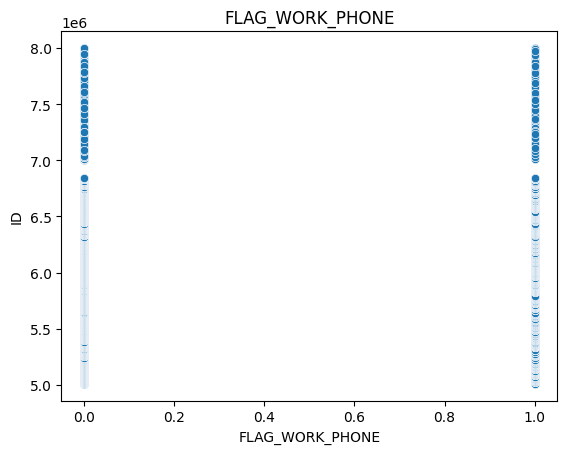

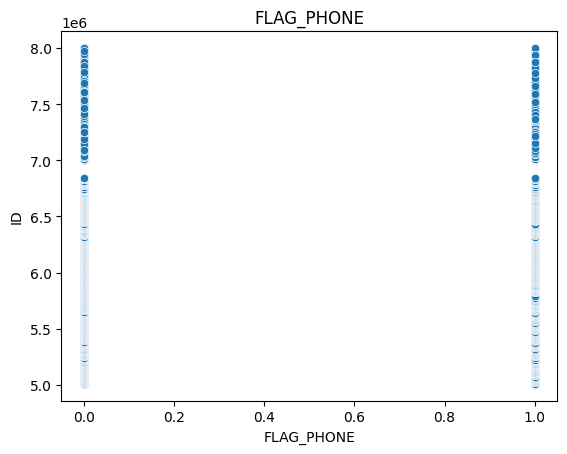

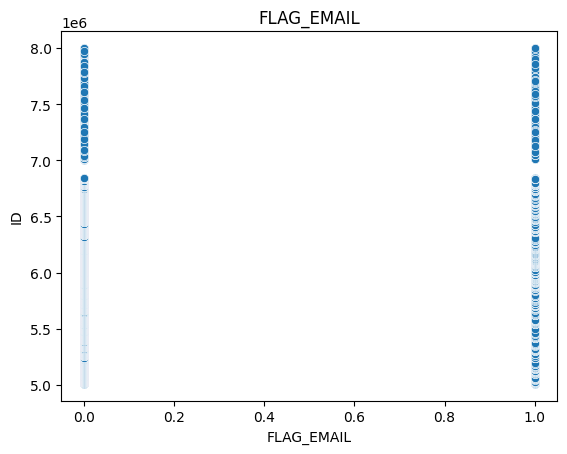

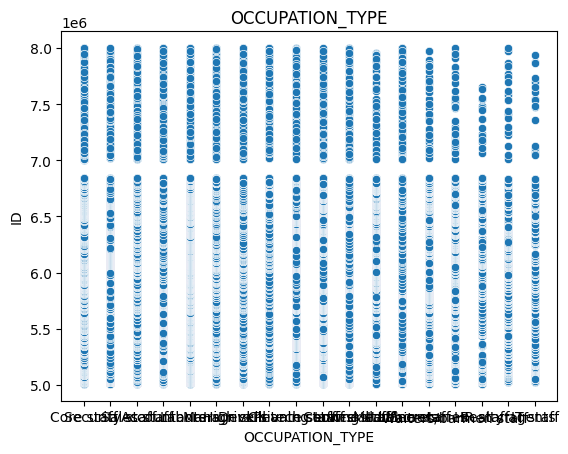

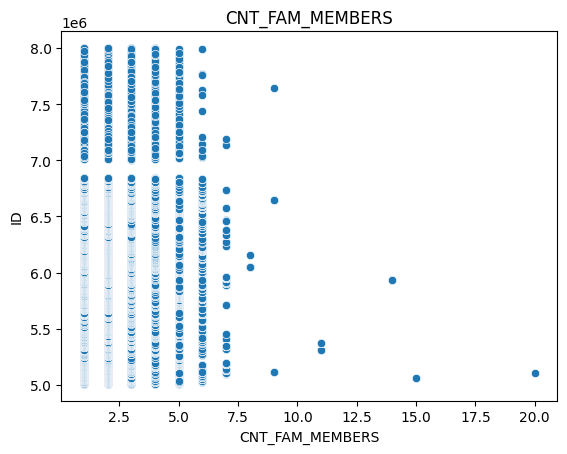

In [27]:
features = application.columns.tolist()

for feature in features:
    if feature == 'ID':
        continue
    sns.scatterplot(data=application, x=feature, y='ID')
    plt.title(feature)
    plt.show()

It appears there are outliers in the following columns:

*   CNT_CHILDREN
*   AMT_INCOME_TOTAL
*   CNT_FAM_MEMBERS



we will remove those outliers.

In [28]:
# CNT_CHILDREN
q_hi = application['CNT_CHILDREN'].quantile(0.999)
q_low = application['CNT_CHILDREN'].quantile(0.001)
application = application[(application['CNT_CHILDREN'] > q_low) & (application['CNT_CHILDREN'] < q_hi)]

In [29]:
# AMT_INCOME_TOTAL
q_hi = application['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = application['AMT_INCOME_TOTAL'].quantile(0.001)
application = application[(application['AMT_INCOME_TOTAL'] > q_low) & (application['AMT_INCOME_TOTAL'] < q_hi)]

In [30]:
# CNT_FAM_MEMBERS
q_hi = application['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = application['CNT_FAM_MEMBERS'].quantile(0.001)
application = application[(application['CNT_FAM_MEMBERS'] > q_low) & (application['CNT_FAM_MEMBERS'] < q_hi)]

### 5. Encoding

Encoding Categorical features.

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_features = application.select_dtypes(include='object').columns.tolist()
object_features

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [32]:
for feature in object_features:
    application[feature] = le.fit_transform(application[feature])

In [33]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438536,6837264,0,0,0,2,90000.0,2,1,3,1,-16062,-1275,1,0,0,0,3,4.0
438539,6837454,1,1,1,1,162000.0,2,4,1,1,-10890,-2675,1,0,0,0,3,3.0
438542,6837905,1,1,1,1,355050.0,4,4,1,1,-15904,-2614,1,0,0,0,8,3.0
438543,6837906,1,1,1,1,355050.0,4,4,1,1,-15904,-2614,1,0,0,0,8,3.0


### -> Credit Dataset

* 0: 1-29 days past due
* 1: 30-59 days past due
* 2: 60-89 days overdue
* 3: 90-119 days overdue
* 4: 120-149 days overdue
* 5: Overdue or bad debts, write-offs for more than 150 days
* C: paid off that month
* X: No loan for the month


In [34]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


It appears that the credit record dataset are set in a format which need to be grouped by the 'ID'.

The approach is as of following:
* Each 'ID' keeps the latest month (max(MONTHS_BALANCE)).
* Each 'ID' keeps the worst (highest) status after transformation.
* If any month had 'X' or 'C' (converted to 1), the final status is 1 (Good Client).
* If the user had only overdue payments, the final status is 0 (Bad Client).


Basically, we are hunting the bad clients, if 'STATUS' >= 2 represents serious overdue payments, this transformation marks those customers with 1 (high risk). If 'STATUS' < 2 means acceptable risk or good clients, they are marked with 0.


In [35]:
credit_record['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
credit_record['STATUS'] = credit_record['STATUS'].astype('int')
credit_record['STATUS'] = credit_record['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [36]:
credit_record = credit_record.groupby('ID').agg(max).reset_index()

credit_record.drop('MONTHS_BALANCE', axis=1, inplace=True)

In [37]:
credit_record.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


Now it's fixed.

It appears that a new problem arises and that is the imbalance of target value samples.

In [38]:
credit_record['STATUS'].value_counts(normalize=True)

STATUS
0    0.985495
1    0.014505
Name: proportion, dtype: float64

We will address this problem in the Model Building section.

### 6. Merging

In [39]:
df = pd.merge(application, credit_record, on='ID', how='inner')

In [40]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
1,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
2,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
3,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0
4,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,10,3.0,0


In [41]:
df.shape

(9516, 19)

There are 9516 rows ready for deployment.

## Model Building

Splitting the data into X & y and further into train & test.

In [42]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

Scaling the training data.

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Addressing the oversampling problem by evening the target samples using SMOTE.

In [45]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

#### Model Building:

##### 1. Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf_entropy = DecisionTreeClassifier(
    criterion="entropy", random_state=100,
    max_depth=3, min_samples_leaf=5)
model_entropy = clf_entropy.fit(X_train, y_train)
prediction = model_entropy.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
print(classification_report(y_test, prediction))

Accuracy: 49.81%
              precision    recall  f1-score   support

           0       0.98      0.50      0.66      2809
           1       0.02      0.50      0.03        46

    accuracy                           0.50      2855
   macro avg       0.50      0.50      0.35      2855
weighted avg       0.97      0.50      0.65      2855



##### 2. Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=100, random_state=100,
    max_depth=3, min_samples_leaf=5)
model = clf.fit(X_train, y_train)
prediction = model.predict(X_test)

In [51]:
print(f"Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
print(classification_report(y_test, prediction))

Accuracy: 80.11%
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2809
           1       0.03      0.37      0.06        46

    accuracy                           0.80      2855
   macro avg       0.51      0.59      0.47      2855
weighted avg       0.97      0.80      0.88      2855



##### 3. KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

In [53]:
print(f"Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
print(classification_report(y_test, prediction))

Accuracy: 96.60%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2809
           1       0.23      0.46      0.30        46

    accuracy                           0.97      2855
   macro avg       0.61      0.72      0.64      2855
weighted avg       0.98      0.97      0.97      2855



##### 4. XgBoost

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
model = xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)

In [49]:
print(f"Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
print(classification_report(y_test, prediction))

Accuracy: 98.21%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2809
           1       0.42      0.28      0.34        46

    accuracy                           0.98      2855
   macro avg       0.70      0.64      0.66      2855
weighted avg       0.98      0.98      0.98      2855



##### 5. SVM

In [54]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=100)
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

In [55]:
print(f"Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
print(classification_report(y_test, prediction))

Accuracy: 62.31%
              precision    recall  f1-score   support

           0       0.99      0.62      0.77      2809
           1       0.02      0.54      0.04        46

    accuracy                           0.62      2855
   macro avg       0.51      0.58      0.40      2855
weighted avg       0.97      0.62      0.75      2855



##### 6. Neural Network

In [56]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=100)
mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)

In [57]:
print(f"Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
print(classification_report(y_test, prediction))

Accuracy: 96.71%
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2809
           1       0.22      0.41      0.29        46

    accuracy                           0.97      2855
   macro avg       0.61      0.69      0.64      2855
weighted avg       0.98      0.97      0.97      2855

